<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"></a>
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

<h1 align=left><font size = 6, style="color:rgb(200,0,0)">Lab</font></h1>
<hr>

 # **Árvores de Decisão e Modelos Supervisionados em Geral**
 ## Instruções

1. Empregue para este Laboratório o **material de Teoria**.

1. **Responda as questões** à medida que você realiza o Lab.

2. Execute este Lab no **Colab Google**.

<img src="http://meusite.mackenzie.br/rogerio/TIC/SUP_ML.png" width=800, align="center"></a>
<h1 align=left><font size = 2, style="color:rgb(200,0,0)"> Fig. 1.Esquema Geral para Modelos Supervisionados </font></h1>

<small><b>ERRATA: na figura considere confusion_matrix(y_test, y_pred)


# Caso: **Propensão de Compra de Clientes por Telemarketing**

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

Os dados estão relacionados com campanhas de marketing direto de uma instituição bancária portuguesa. As campanhas de marketing foram baseadas em telefonemas. Freqüentemente, era necessário mais de um contato para o mesmo cliente, para acessar se o produto (depósito bancário) seria ('yes') ou não ('no') assinado.

Os dados estão na URL: http://meusite.mackenzie.br/rogerio/TIC/bank-full.csv




# Exercício. Acesse e Explore os dados

1. Qual o atributo **classe**?
1. Quantos registros de cada **classe**?
1. Todos os dados são numéricos? (por quê?)
1. Os dados encontram-se na mesma escala?
1. Qual o tamanho dos dados? (linhas e atributos)
1. Existem valores nulos?


In [656]:
# imports

import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import warnings
import os
import seaborn as sns
warnings.filterwarnings("ignore")

In [657]:
url="http://meusite.mackenzie.br/rogerio/TIC/bank-full.csv"
bank=pd.read_csv(url)
print(f"shape dataframe: rows = {bank.shape[0]} and columns = {bank.shape[1]}")

shape dataframe: rows = 45211 and columns = 17


In [658]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### Exercício. (**RESOLVIDO**)

Aqui verificamos se existem valores ausentes nos dados. Valores ausentes trazem em geral problemas (por quê?) e precisam ser tratados antes de empregarmos modelos. Veremos mais adiante como podemos tratar isso.

In [659]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [660]:
if (bank.isnull().sum().sum()) == 0:
  print('Não existem valores ausentes (nulos)')

Não existem valores ausentes (nulos)


### Exercício. Defina as entradas `X` e saída `y` modelo

Lembre-se, em um modelo de classificação $X$ são as variáveis preditoras (*independentes*) e $y$ sua variável objetivo (*dependente*).

In [661]:
X = bank.drop(['y'], axis=1)
y = bank['y']

In [662]:
X.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [663]:
X[X.select_dtypes(['object']).columns] = X.select_dtypes(['object']).apply(lambda x: x.astype('category'))
X.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
dtype: object

# Preparação dos Dados

A **Preparação dos Dados** consiste em transformações dos dados que são necessárias ou úteis para preparar os dados para uso dos modelos. Encontram-se entre essas transformações:

1. Tratamento de valores faltantes
2. Normalizações
3. Codificação de Valores categóricos para numéricos (*encode*)
4. Codificação de Valores numéricos para classes de valores (discretização ou *binning*)
5. etc.

Vamos fazer aqui duas operações sobre os dados:

1. **Label encode**. Embora Árvores de Decisão possam empregar atributos categóricos, o `scikit-learn` requer que esses atributos sejam `label_encode`. É um requerimento da tecnologia, não do modelo.

1. **Normalização**. Árvores de Decisão também não são sensíveis a variação de escala (por quê?), mas vamos reescalar os dados para que você aprenda mais essa técnica e empregá-la no modelo `knn` mais adiante.

A primeira transformação é meramente técnica e faremos para você.

## Exercício. **Label Encode (RESOLVIDO)**

Podemos fazer isso de diversas formas, mas o `scikit-learn` traz funções para isso.

In [664]:
from sklearn.preprocessing import LabelEncoder

df_categorical = X.select_dtypes(exclude='number')
#  label encoding to all the columns

print('Label Encode attributes: ', df_categorical)

print('education, valores antes: ', X.education.value_counts())

label_encoders = {}
for col in df_categorical:
  le = LabelEncoder()
  le.fit(X[col])
  X[col] = le.transform(X[col])
  label_encoders[col] = le # salva para empregar para novas instâncias

print('education, valores depois: ', X.education.value_counts())

Label Encode attributes:                  job   marital  education default housing loan    contact  \
0        management   married   tertiary      no     yes   no    unknown   
1        technician    single  secondary      no     yes   no    unknown   
2      entrepreneur   married  secondary      no     yes  yes    unknown   
3       blue-collar   married    unknown      no     yes   no    unknown   
4           unknown    single    unknown      no      no   no    unknown   
...             ...       ...        ...     ...     ...  ...        ...   
45206    technician   married   tertiary      no      no   no   cellular   
45207       retired  divorced    primary      no      no   no   cellular   
45208       retired   married  secondary      no      no   no   cellular   
45209   blue-collar   married  secondary      no      no   no  telephone   
45210  entrepreneur   married  secondary      no      no   no   cellular   

      month poutcome  
0       may  unknown  
1       may  un

## Exercício. Explore as técnicas de *Scale*

Verifique qual dos métodos abaixo corresponde a normalização:

$$ X_s = (X - X_{min}) / (X_{max} - X_{min}) $$

In [665]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler


In [666]:
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]

scaler = Normalizer() # SUBSTITUA AQUI O MÉTODO
scaler.fit(data)
print(scaler.transform(data))

[[-0.4472136   0.89442719]
 [-0.08304548  0.99654576]
 [ 0.          1.        ]
 [ 0.05547002  0.99846035]]


In [667]:
X.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
dtype: object

### Exercício. Aplique o `StandardScaler` aos dados

Qual o a média e o desvido padrão dos valores de `X` depois da transformação?

In [668]:
# Seu código

# Seu dado de entrada é X. Atribua a saída transformada para X_matrix.

scaler = StandardScaler() # SUBSTITUA AQUI O MÉTODO
X_scaler = scaler.fit_transform(X)

In [669]:
# Os dados transformados são então empregados para reconstruir o dataframe X.

X = pd.DataFrame(X_scaler,columns=X.columns) # nada a fazer aqui, aqui a linha de código está pronta
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.606965,-0.103820,-0.275762,1.036362,-0.13549,0.256419,0.893915,-0.436803,1.514306,-1.298476,0.823773,0.011016,-0.569351,-0.411453,-0.251940,0.444898
1,0.288529,1.424008,1.368372,-0.300556,-0.13549,-0.437895,0.893915,-0.436803,1.514306,-1.298476,0.823773,-0.416127,-0.569351,-0.411453,-0.251940,0.444898
2,-0.747384,-0.714951,-0.275762,-0.300556,-0.13549,-0.446762,0.893915,2.289359,1.514306,-1.298476,0.823773,-0.707361,-0.569351,-0.411453,-0.251940,0.444898
3,0.571051,-1.020516,-0.275762,2.373280,-0.13549,0.047205,0.893915,-0.436803,1.514306,-1.298476,0.823773,-0.645231,-0.569351,-0.411453,-0.251940,0.444898
4,-0.747384,2.035139,1.368372,2.373280,-0.13549,-0.447091,-1.118674,-0.436803,1.514306,-1.298476,0.823773,-0.233620,-0.569351,-0.411453,-0.251940,0.444898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,1.424008,-0.275762,1.036362,-0.13549,-0.176460,-1.118674,-0.436803,-0.713012,0.143418,1.156344,2.791329,0.076230,-0.411453,-0.251940,0.444898
45207,2.831227,0.201746,-1.919895,-1.637474,-0.13549,0.120447,-1.118674,-0.436803,-0.713012,0.143418,1.156344,0.768224,-0.246560,-0.411453,-0.251940,0.444898
45208,2.925401,0.201746,-0.275762,-0.300556,-0.13549,1.429593,-1.118674,-0.436803,-0.713012,0.143418,1.156344,3.373797,0.721811,1.436189,1.050473,-0.566175
45209,1.512791,-1.020516,-0.275762,-0.300556,-0.13549,-0.228024,-1.118674,-0.436803,0.400647,0.143418,1.156344,0.970146,0.399020,-0.411453,-0.251940,0.444898


In [670]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

### Exercício. Separe os Conjuntos de Treinamento `X_train`, `y_train` e Test `X_test`, `y_test`


In [671]:
# Seu código
from sklearn.model_selection import train_test_split
seed = 1984 # empregue este

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

Qual a dimensão dos conjuntos `X_train, X_test, y_train, y_test`?

In [672]:
print('X and y shapes     (row, column)')
print(f'X train .........: {X_train.shape}')
print(f'X test  ........ : {X_test.shape}')
print(f'y train .........: {y_train.shape}')
print(f'y test  .........: {y_test.shape}')

X and y shapes     (row, column)
X train .........: (31647, 16)
X test  ........ : (13564, 16)
y train .........: (31647,)
y test  .........: (13564,)


Exiba os primeiros regitros de `X_train`. Qual o primeiro registro que aparece?

In [673]:
X_train.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
20724,1.041921,-1.020516,-0.275762,-1.637474,-0.13549,-0.435596,-1.118674,-0.436803,-0.713012,-0.337213,-1.504223,-0.579218,-0.246560,-0.411453,-0.251940,0.444898
41531,0.382703,-0.103820,-0.275762,1.036362,-0.13549,-0.189269,-1.118674,-0.436803,-0.713012,-0.697687,1.821486,-0.676296,0.076230,-0.411453,-0.251940,0.444898
17467,-0.653211,-1.020516,-0.275762,-0.300556,-0.13549,0.105010,0.893915,2.289359,-0.713012,1.465155,-0.173939,-0.524854,0.076230,-0.411453,-0.251940,0.444898
2314,-0.464863,-1.020516,-0.275762,-0.300556,-0.13549,0.062970,0.893915,-0.436803,1.514306,-0.457371,0.823773,0.259536,0.399020,-0.411453,-0.251940,0.444898
31681,0.476877,-1.326082,-1.919895,-0.300556,-0.13549,-0.053953,0.893915,2.289359,-0.713012,-1.058161,-1.836794,2.247692,-0.569351,2.664621,0.182198,-1.577248


### Exercício. Declare o modelo e seus parâmetros `clf = model`

Declare um modelo de Árvore de decisão com o critério `gini` e o `seed` já empregado antes.

In [674]:
from sklearn.tree import DecisionTreeClassifier
# Create the decision tree classifier
clf = DecisionTreeClassifier(criterion='gini', random_state=seed)

### Exercício. Treine o modelo `clf.train(X_train, y_train)` e aplique ao conjunto de Teste `clf.pred(X_test)`


In [675]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


Qual a previsão para os 3 primeiros casos?

In [676]:
y_pred[0:3]

array([0, 0, 0])

Quantos casos foram classificados como 'yes'?


In [677]:
0

0

### Exercício. Verifique os resultados, `<metric>(y_pred, y_test)`

In [678]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [679]:
score = round(metrics.precision_score(y_test, y_pred, average='macro'), 2)
print(f'Score = {score}')

Score = 0.7


In [680]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", round(accuracy, 2))

Accuracy Score: 0.88


In [681]:
mean_absolute_error(y_test, y_pred)

0.12481568858743733

Qual a acuracidade total e qual classe apresenta pior resultado de classificação?

### Exercício. Crie um novo modelo `clf2` a partir do modelo anterior, alterando o método de seleção dos nós para `entropy` e a profundidade máxima da árvore para 16.

O resultado é melhor ou pior que o modelo anterior?

In [682]:
# Create the decision tree classifier
clf2 = DecisionTreeClassifier(criterion='entropy', random_state=seed,  max_depth=16)

In [683]:
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)

In [684]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", round(accuracy, 4))

Accuracy Score: 0.886


### Exercício. Crie um novo modelo `clf3` do tipo k-vizinhos k=5 mais próximos

O resultado é melhor ou pior que o modelo anterior?

In [685]:
from sklearn.neighbors import KNeighborsClassifier


In [686]:
# Normalization
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [687]:
#Train Model and Predict
k = 5 
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc = round(metrics.accuracy_score(y_test, y_pred), 4)
print(f"Accuracy of model at K={k} is {acc}")

Accuracy of model at K=5 is 0.8993


### Exercício. Selecione o Modelo `clf2` e aplique a novos casos, `clf2.predict(X_new)` **RESOLVIDO**

Os novos casos aqui são gerados como permutação dos dados já presentes na base. Basta executar e fazer em seguida a previsão.

In [688]:
seed1 = 1964
new_bank = bank.sample(10,random_state=seed1)
new_bank = new_bank.sample(frac = 1)
new_bank.y = '?'
new_bank.head()

X_new = new_bank.drop(columns=['y'])

for col in df_categorical:
  le = label_encoders[col] # usando as transformações salvas anteriormente
  X_new[col] = le.transform(X_new[col])

X_new_matrix = scaler.transform(X_new)
X_new = pd.DataFrame(X_new_matrix,columns=X_new.columns)

A predição...

In [689]:
# Seu código

y_pred = clf2.predict(X_new)

new_bank.y = y_pred

print(new_bank)

       age          job   marital  education default  balance housing loan  \
14648   32   management  divorced   tertiary      no      222      no  yes   
12804   40   technician   married    unknown      no        0      no  yes   
10622   36   management    single   tertiary      no      317      no   no   
27994   31   technician    single   tertiary      no     3222     yes   no   
2961    28  blue-collar   married  secondary      no     1238     yes   no   
19488   31   technician   married  secondary      no       54      no   no   
24138   36       admin.   married  secondary      no     3321     yes   no   
888     32   management   married   tertiary      no      233     yes   no   
40638   30   management    single   tertiary      no      685      no   no   
33634   34     services   married  secondary      no      790     yes   no   

         contact  day month  duration  campaign  pdays  previous poutcome  y  
14648   cellular   15   jul       820         4     -1        

### Exercício. Plote sua Árvore de Decisão **RESOLVIDO**



[Text(0.593526032360532, 0.9705882352941176, 'x[11] <= 0.479\nentropy = 0.518\nsamples = 31647\nvalue = [27970, 3677]'),
 Text(0.3643305166765932, 0.9117647058823529, 'x[8] <= 0.957\nentropy = 0.342\nsamples = 25644\nvalue = [24010, 1634]'),
 Text(0.2025343706571372, 0.8529411764705882, 'x[11] <= -0.484\nentropy = 0.428\nsamples = 18175\nvalue = [16584, 1591]'),
 Text(0.0409218656938654, 0.7941176470588235, 'x[11] <= -0.702\nentropy = 0.161\nsamples = 8048\nvalue = [7858, 190]'),
 Text(0.00806035338495136, 0.7352941176470589, 'x[11] <= -0.76\nentropy = 0.042\nsamples = 3518\nvalue = [3502, 16]'),
 Text(0.004129442128250943, 0.6764705882352942, 'x[0] <= 2.925\nentropy = 0.018\nsamples = 2369\nvalue = [2365, 4]'),
 Text(0.002541195155846734, 0.6176470588235294, 'x[0] <= -1.642\nentropy = 0.014\nsamples = 2367\nvalue = [2364, 3]'),
 Text(0.001270597577923367, 0.5588235294117647, 'x[1] <= 1.577\nentropy = 0.297\nsamples = 19\nvalue = [18, 1]'),
 Text(0.0006352987889616835, 0.5, 'entropy = 

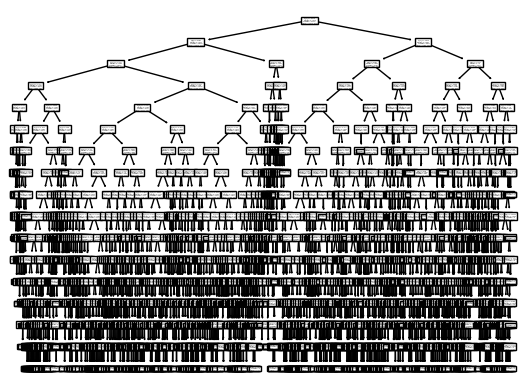

In [690]:
from sklearn import tree
tree.plot_tree(clf2)